In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import gmsh
import cv2
from sklearn.linear_model import LinearRegression
import matplotlib as mpl

In [2]:
# Setting Matplotlib plotting defaults
# Font
mpl.rcParams['font.family']           ='Serif'    # Setting Font family
mpl.rcParams['font.size']             = 18        # Setting Font size
# Figure
mpl.rcParams["figure.figsize"]        = (11, 7)   # Setting Figure size
mpl.rcParams['savefig.dpi']           = 300       # Setting plot quality
# Legend
mpl.rcParams["legend.fontsize"]       = 15        # Legend fontsize
mpl.rcParams["legend.title_fontsize"] = 15        # Legend fontsize
# Grid
mpl.rcParams["axes.grid"]             = True      # Setting grid to display
mpl.rcParams["grid.color"]            ='black'    # Setting grid color
mpl.rcParams['grid.linestyle']        ='dotted'   # Setting grid linestyle
mpl.rcParams['grid.linewidth']        = 0.3       # Setting grid linewidth
# xticks
mpl.rcParams["xtick.minor.visible"]   = True      # Setting visibility of xticks
mpl.rcParams['xtick.minor.width']     = 1.0       # Setting width of minor xticks
mpl.rcParams['xtick.major.width']     = 1.0       # Setting width of major xticks
mpl.rcParams['xtick.direction']       ='inout'    # Setting directions of xticks
mpl.rcParams['xtick.minor.size']      = 5         # Setting size of minor xticks
mpl.rcParams['xtick.major.size']      = 8         # Setting size of major xticks
mpl.rcParams['xtick.top']             = True      # Setting visibility of top minor xticks
# yticks
mpl.rcParams["ytick.minor.visible"]   = True      # Setting visibility of yticks
mpl.rcParams['ytick.minor.width']     = 1.0       # Setting width of minor yticks
mpl.rcParams['ytick.major.width']     = 1.0       # Setting width of major xticks
mpl.rcParams['ytick.direction']       ='inout'    # Setting directions of yticks
mpl.rcParams['ytick.minor.size']      = 5         # Setting size of minor xticks
mpl.rcParams['ytick.major.size']      = 8         # Setting size of major xticks
mpl.rcParams['ytick.right']           = True      # Setting visibility of top minor xticks

In [3]:
datadf = pd.read_excel('raw_data_file.xlsx')

In [4]:
data = datadf[datadf[datadf.columns[1]] == 'fulfilled']

In [5]:
weeks = data[data.columns[10]].dt.isocalendar().week
salesWeekWise = data.groupby(weeks)['Lineitem price'].sum()
months = data[data.columns[10]].dt.month
salesMonthWise = data.groupby(months)['Lineitem price'].sum()

In [6]:
weeksNumbers = weeks.unique()
monthNumbers = months.unique()

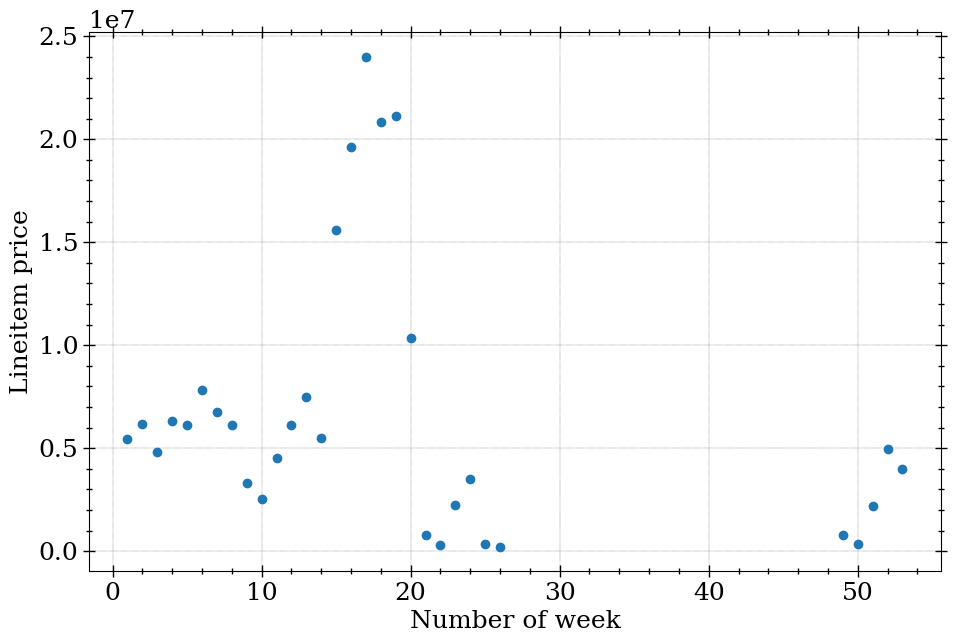

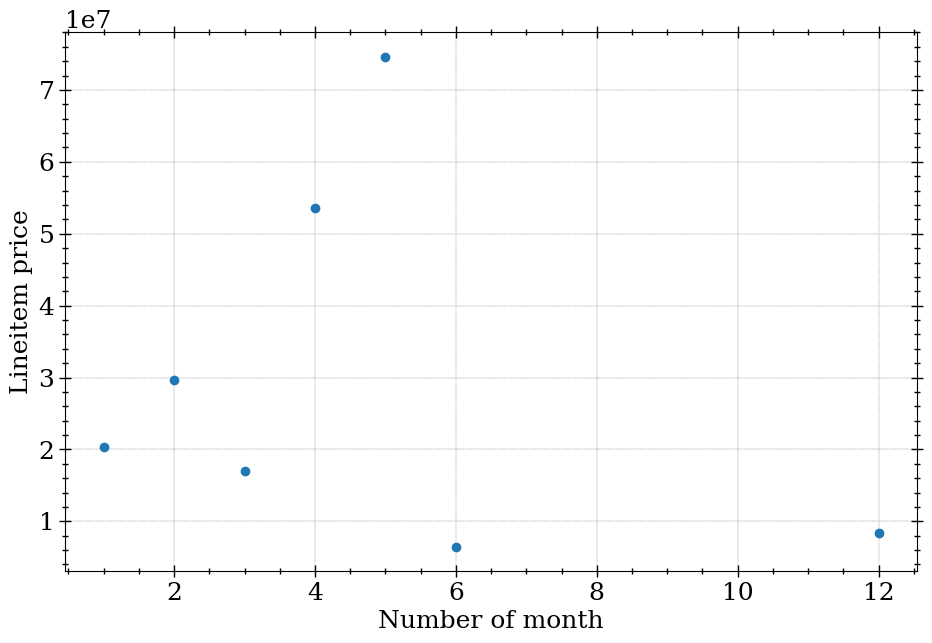

In [7]:
plt.xlabel('Number of week')
plt.ylabel('Lineitem price')
plt.plot(weeksNumbers,salesWeekWise,'o')
plt.show()
plt.xlabel('Number of month')
plt.ylabel('Lineitem price')
plt.plot(monthNumbers,salesMonthWise,'o')
plt.show()


In [8]:
weeks = data[data.columns[10]].dt.isocalendar().week
salesWeekWise = data.groupby(weeks)['Lineitem price'].sum()
months = data[data.columns[10]].dt.month
salesMonthWise = data.groupby(months)['Lineitem price'].sum()

Observations:
Spikes in Lineitem Price: There are a few significant spikes (e.g., between Week 7–10 and Week 15–20).<br>
Drops in Lineitem Price: Several weeks show very low or near-zero revenue, especially around Weeks 20–30.<br>
Periodic Trends: Peaks and troughs seem to repeat around certain intervals, which could indicate cyclical patterns (e.g., seasonality, events, or campaigns).

First 10 weeks can be seen as most sells may be due to following resons:

Winter Season (Northern Hemisphere):
High demand for winter clothing like jackets, sweaters, and thermals due to cold weather.
Clearance sales of winter collections in preparation for spring inventory.<br><br>
New Year Festivities:
People may buy new clothes for celebrations and gatherings.
Retailers often stock more clothes for New Year discounts and sales.

Economic reason can be<br>
End-of-Financial-Year Sales:
Retailers may increase supply to meet sales targets before the end of the fiscal year (varies by region).


May is seen to have sudden surge due to <br>
Spring/Summer Season:
Transition to lighter fabrics, bright colors, and summer wear.
Launch of spring/summer collections by fashion brands.

In [9]:
cities = data[data.columns[-7]].astype(str).str.lower()
cities = cities.str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
cities = cities.str.replace(' ', '') 
cities = cities.str.lower()
cities = cities.replace('bengaluru','bangalore')
city,cnts= np.unique(cities,return_counts=True)
sortedcnts = np.argsort(cnts)[::-1]

In [10]:
cnts[sortedcnts]

array([21104, 12576,  6304,  5904,  5360,  4000,  2432,  2288,  2192,
        2128,  1808,  1344,  1232,  1184,  1168,   736,   736,   704,
         672,   672,   672,   624,   592,   576,   480,   464,   464,
         464,   448,   448,   368,   352,   352,   352,   352,   304,
         288,   288,   272,   272,   272,   272,   272,   256,   224,
         224,   208,   192,   192,   176,   176,   176,   176,   176,
         160,   160,   160,   160,   160,   144,   144,   144,   144,
         144,   144,   144,   144,   144,   144,   144,   144,   144,
         128,   128,   128,   128,   128,   112,   112,   112,   112,
         112,   112,   112,   112,   112,   112,   112,    96,    96,
          96,    96,    96,    96,    96,    96,    96,    96,    96,
          96,    96,    80,    80,    80,    80,    80,    80,    80,
          80,    80,    80,    80,    80,    80,    80,    80,    80,
          80,    80,    80,    80,    80,    64,    64,    64,    64,
          64,    64,

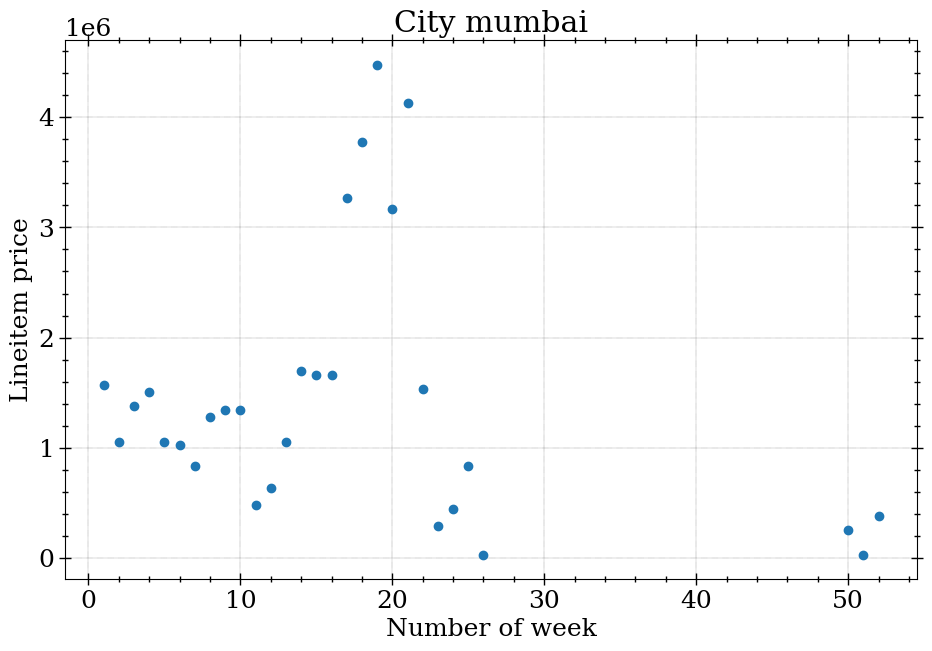

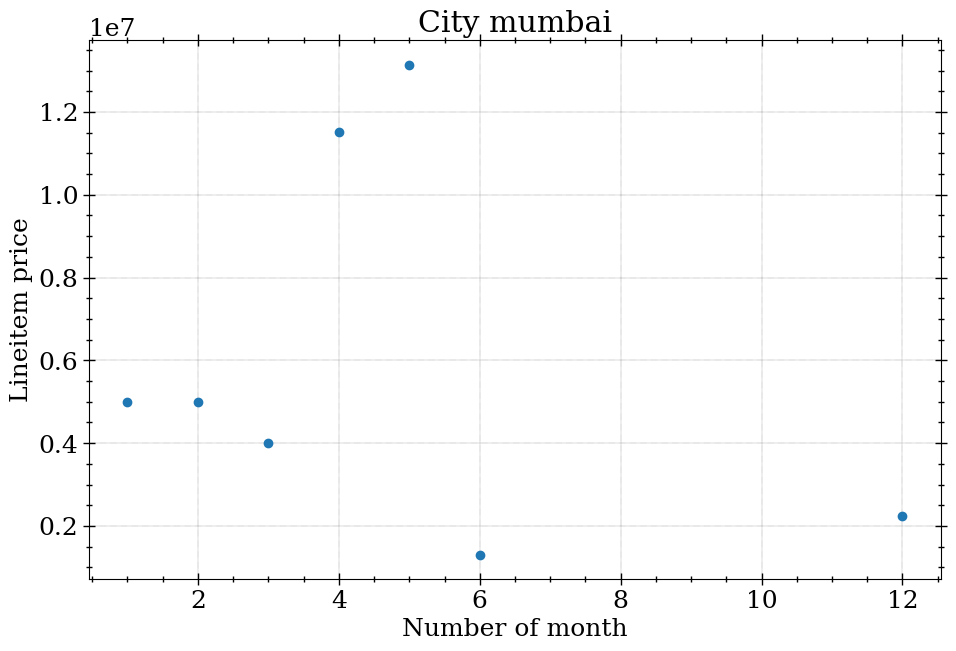

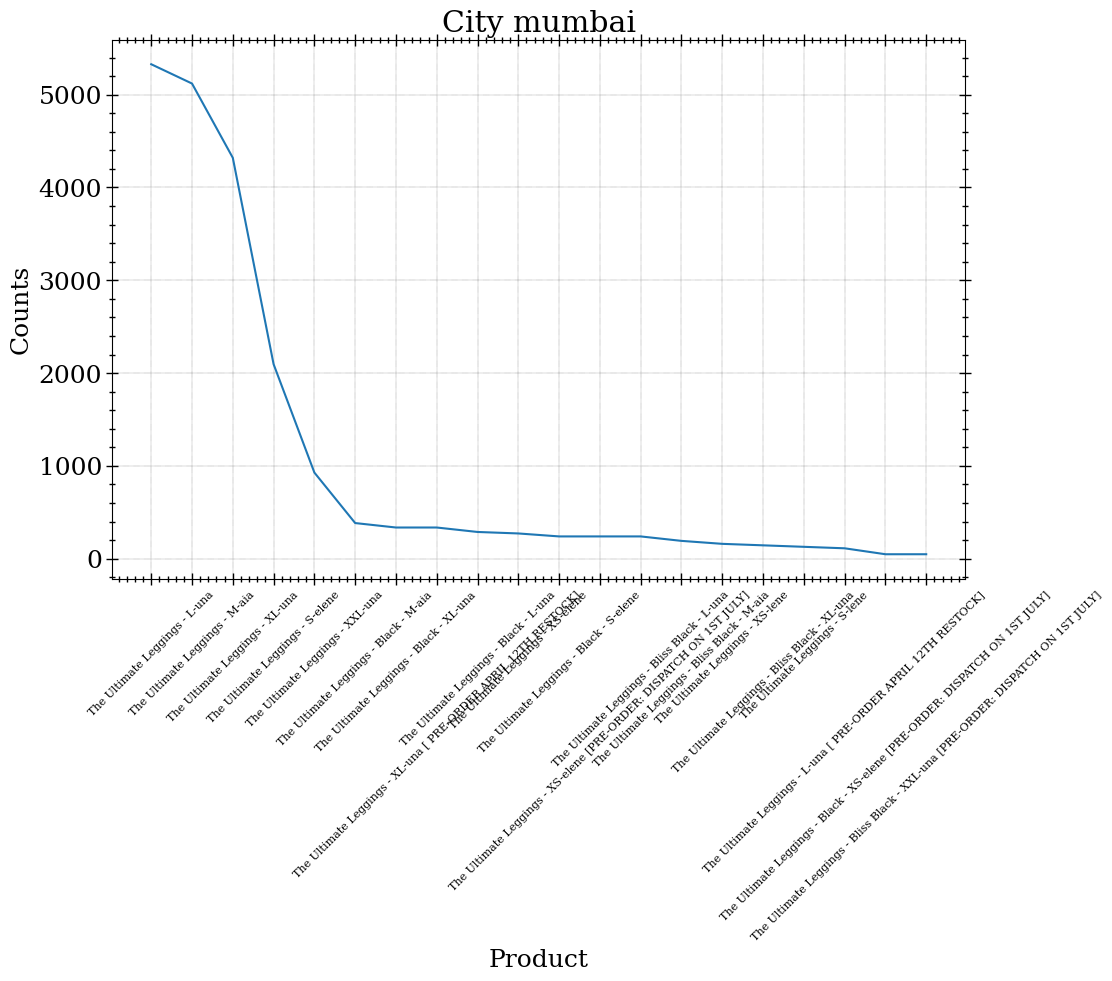

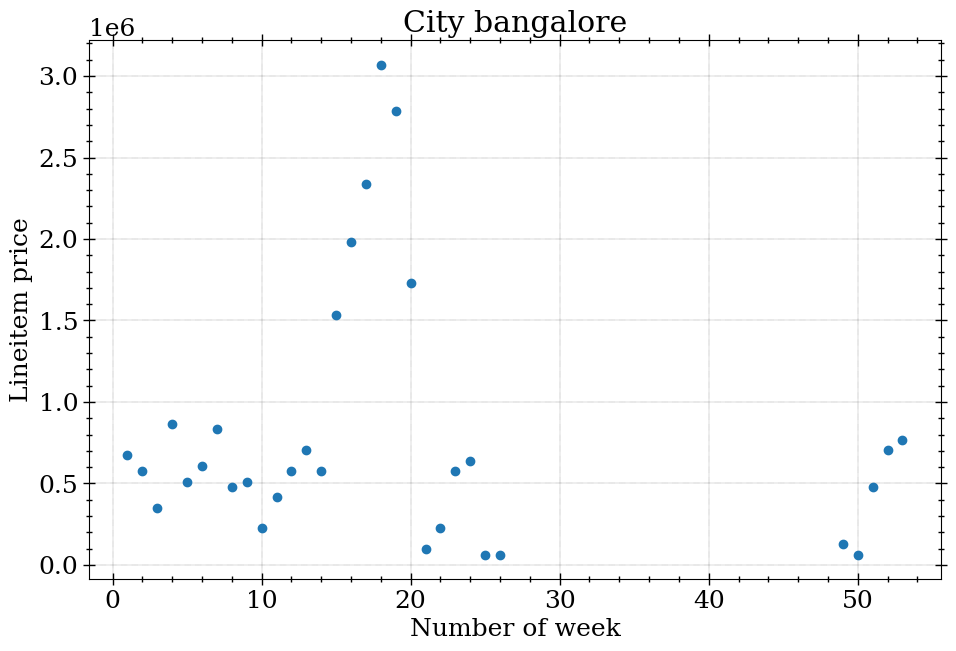

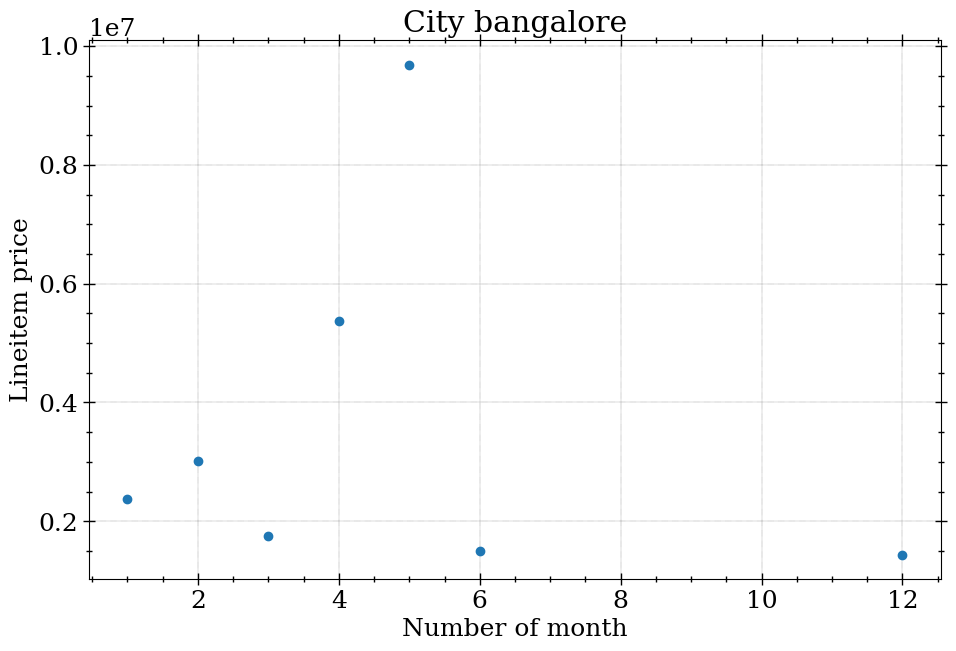

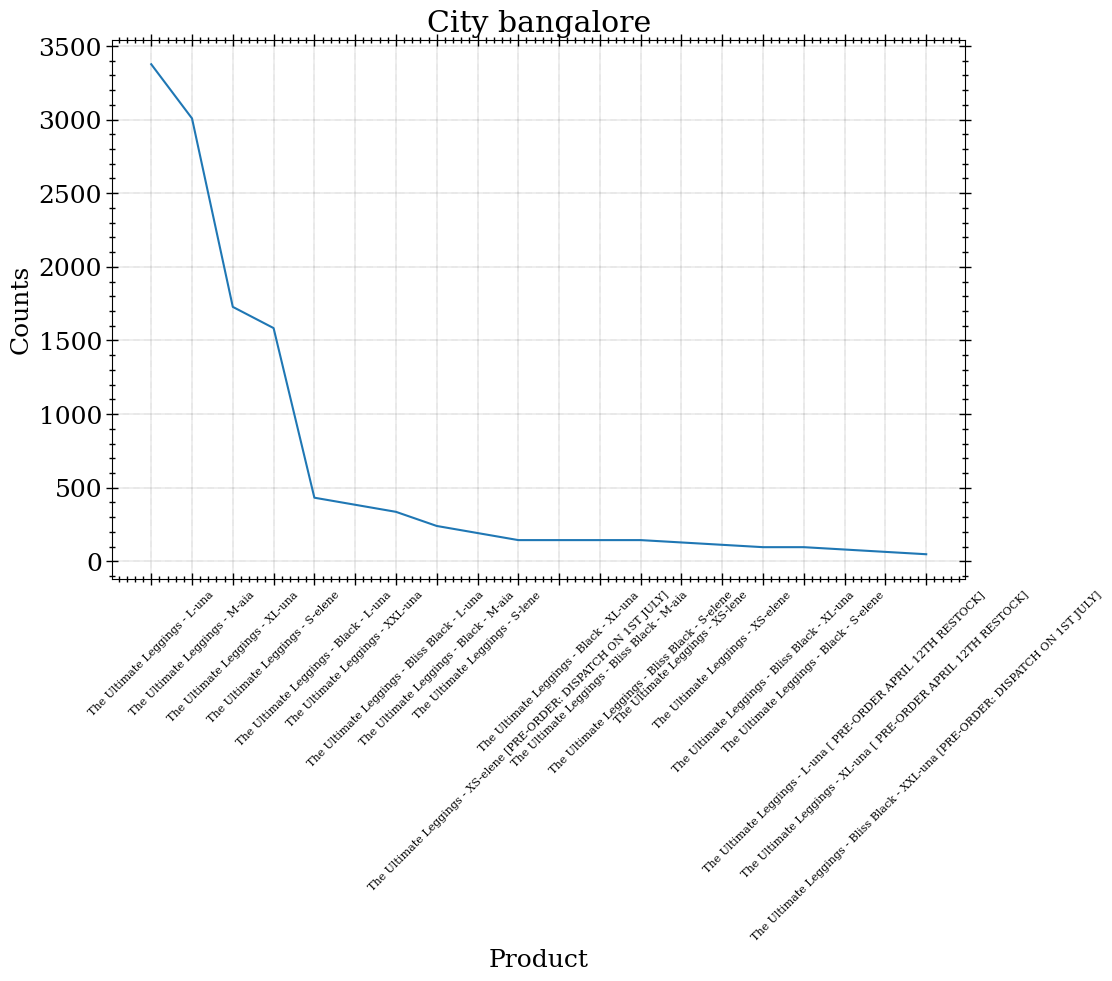

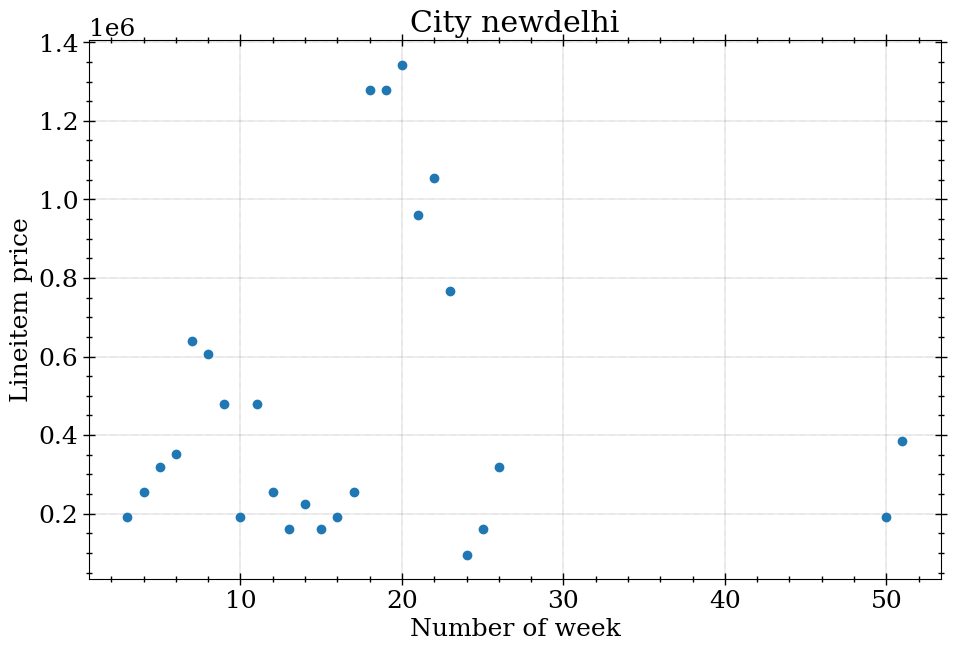

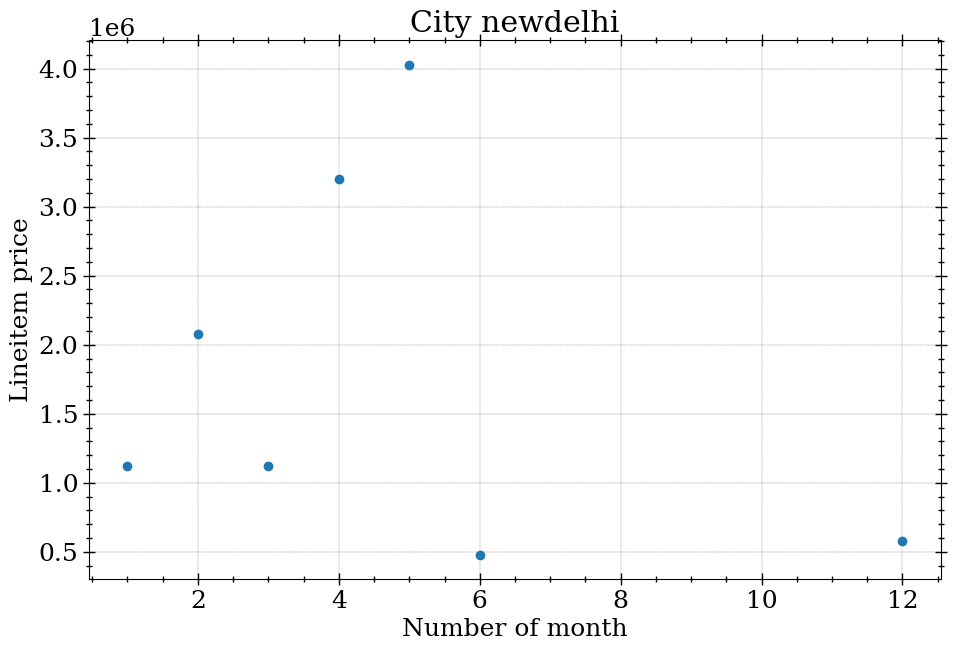

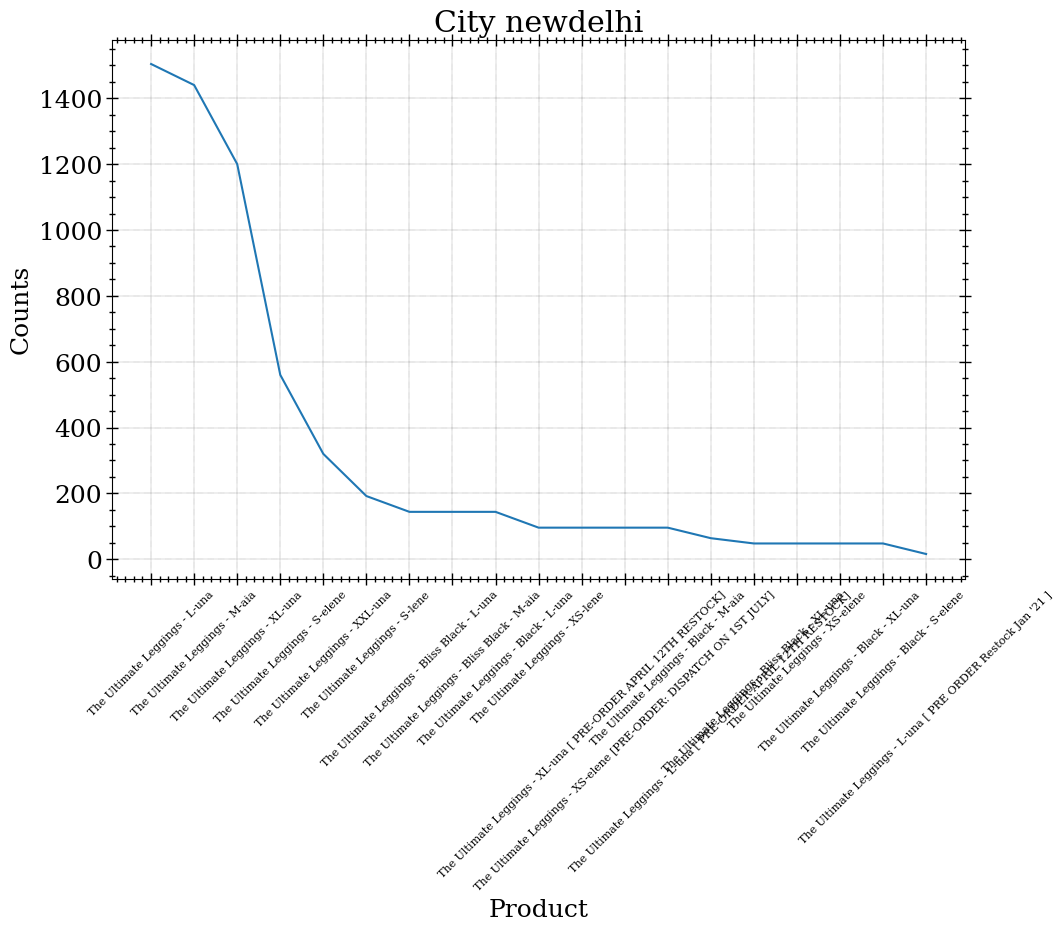

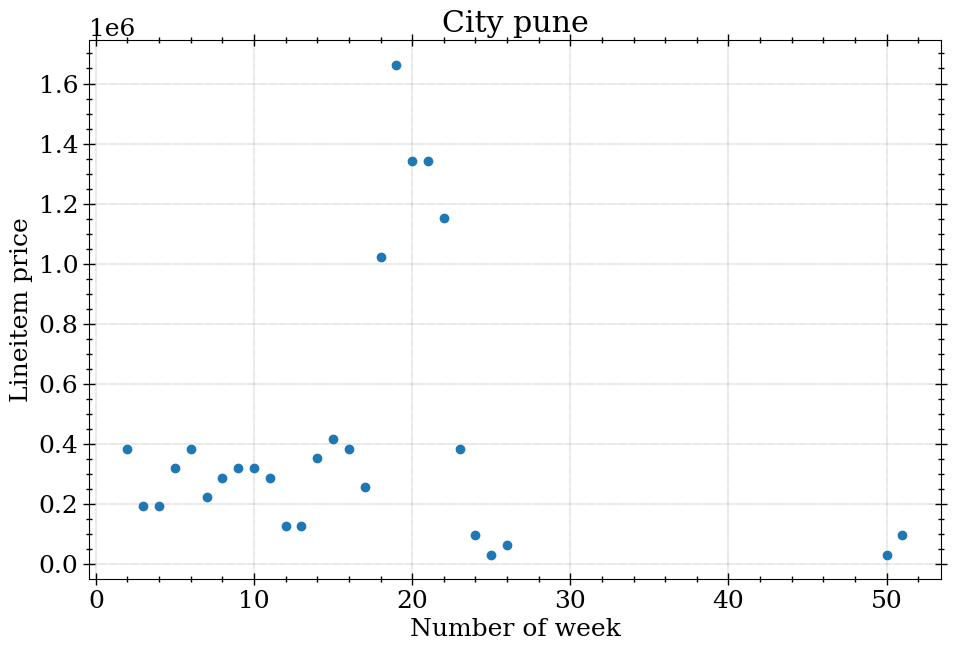

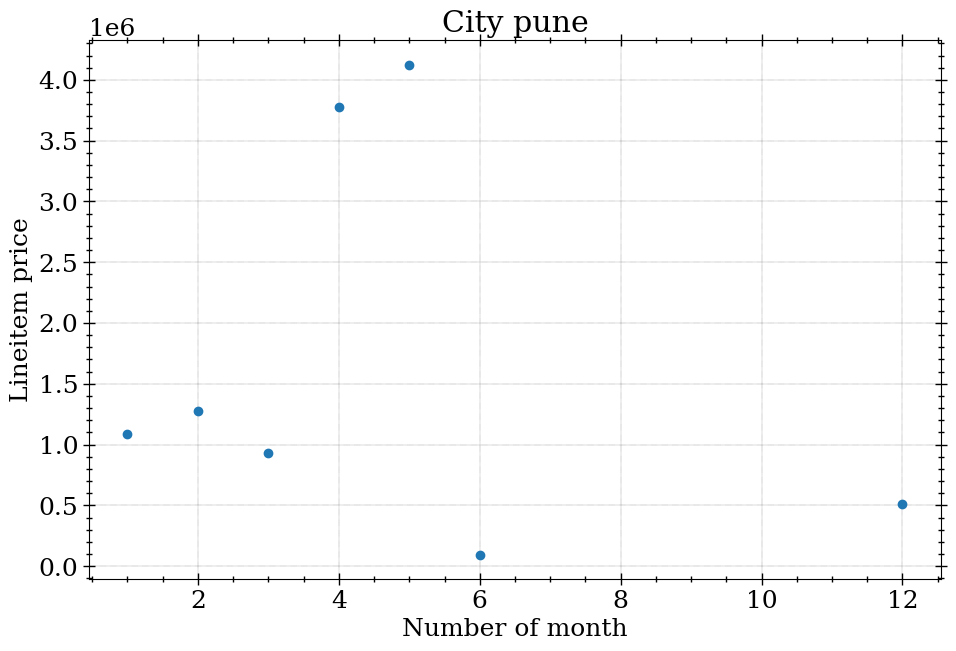

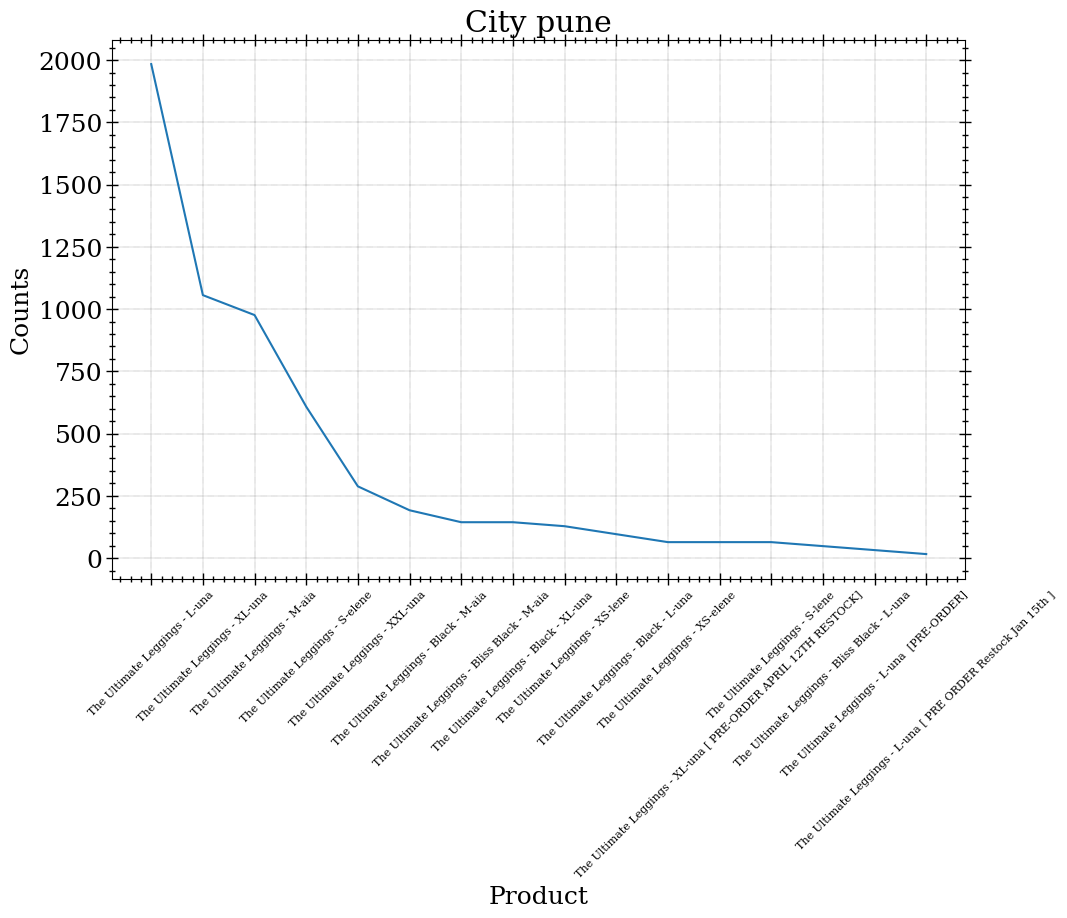

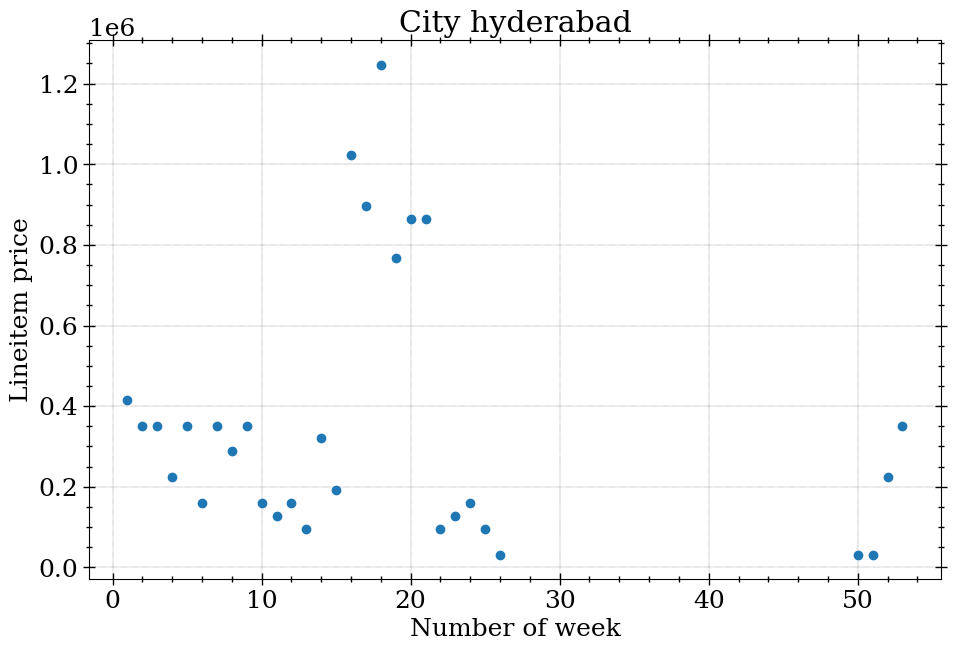

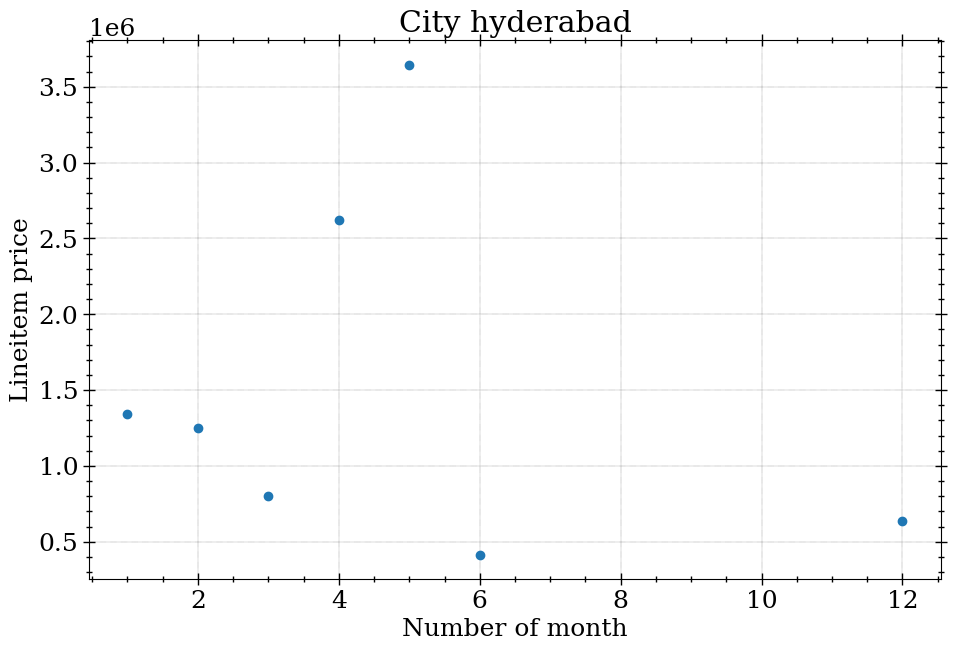

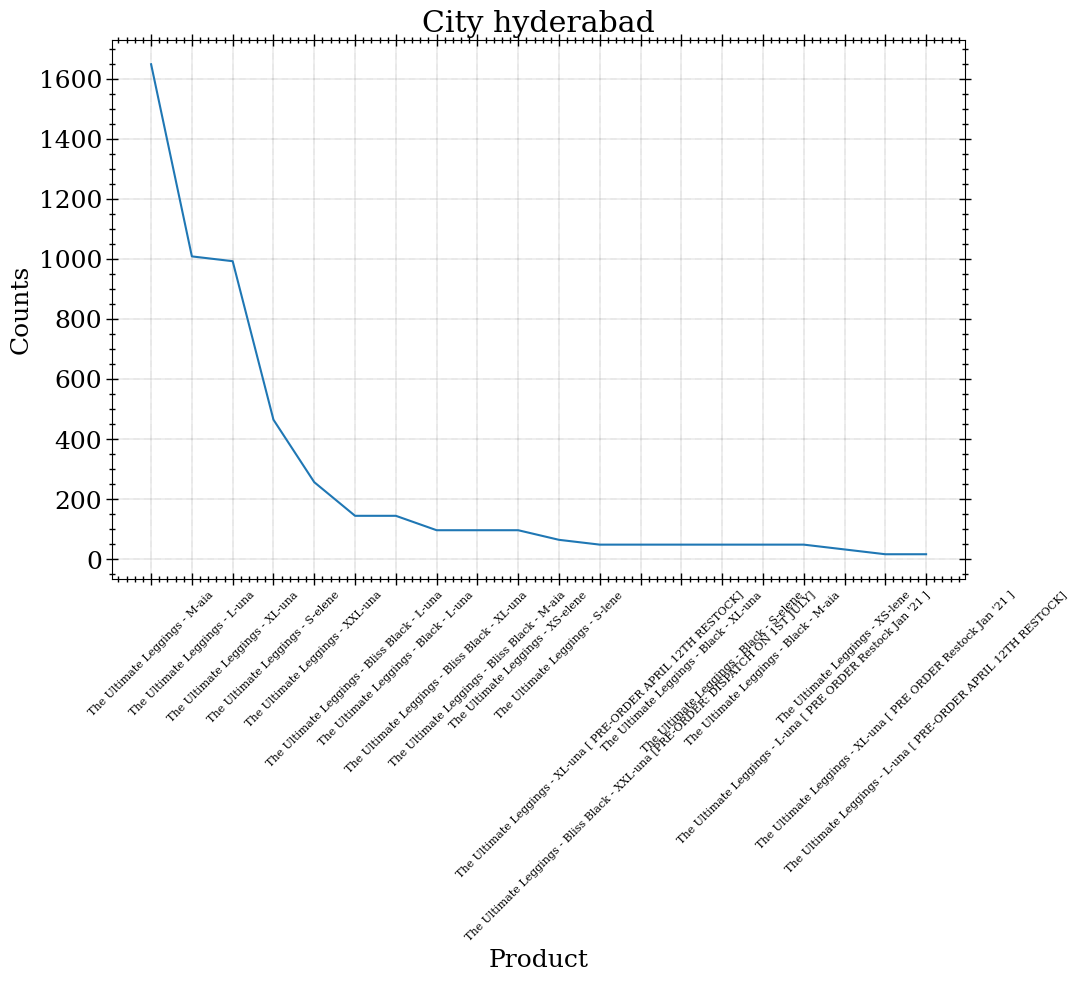

In [17]:
k = 5
topKproducts = 20
topKcities = city[sortedcnts[:k]]
for ithcity in topKcities:
    dataKthCity = data[cities == ithcity]
    prod,count = np.unique(dataKthCity['Product'],return_counts=True)
    sortedcounts = np.argsort(count)[::-1]

    weeks = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week
    salesWeekWise = dataKthCity.groupby(weeks)['Lineitem price'].sum()
    months = dataKthCity[dataKthCity.columns[10]].dt.month
    salesMonthWise = dataKthCity.groupby(months)['Lineitem price'].sum()

    weeksNumbers = weeks.unique()
    monthNumbers = months.unique()

    plt.xlabel('Number of week')
    plt.ylabel('Lineitem price')
    plt.title(f'City {ithcity}')
    plt.plot(weeksNumbers,salesWeekWise,'o')
    plt.show()
    plt.xlabel('Number of month')
    plt.ylabel('Lineitem price')
    plt.title(f'City {ithcity}')
    plt.plot(monthNumbers,salesMonthWise,'o')
    plt.show()

    plt.xlabel('Product')
    plt.ylabel('Counts')
    plt.title(f'City {ithcity}')
    plt.plot(prod[sortedcounts[:topKproducts]],count[sortedcounts[:topKproducts]])
    plt.xticks(rotation=45, fontsize=8)  # Set font size to 
    plt.show()

In [ ]:
k = 5
topKproducts = 20
topKcities = city[sortedcnts[:k]]
for ithcity in topKcities:
    dataKthCity = data[cities == ithcity]
    prod,count = np.unique(dataKthCity['Product'],return_counts=True)
    sortedcounts = np.argsort(count)[::-1]
    plt.xlabel('Product')
    plt.ylabel('Counts')
    plt.title(f'City {ithcity}')
    plt.plot(prod[sortedcounts[:topKproducts]],count[sortedcounts[:topKproducts]])
    plt.xticks(rotation=45, fontsize=8)  # Set font size to 
    plt.show()

array([ 9, 13, 18, 14, 25,  1,  3, 21,  0, 22,  2, 23,  5,  6, 24,  7, 17,
       12,  4,  8, 26, 16, 10, 11, 20, 19, 15], dtype=int64)

In [ ]:
city[sortedcnts[:15]]

array(['mumbai', 'bangalore', 'new delhi', 'pune', 'bengaluru',
       'hyderabad', 'delhi', 'gurgaon', 'gurugram', 'chennai',
       'ahmedabad', 'mumbai ', 'kolkata', 'noida', 'surat'], dtype=object)

In [ ]:
cnts[sortedcnts]

array([19344,  6160,  5728,  5488,  5072,  4832,  3776,  2208,  2192,
        2032,  1968,  1728,  1712,  1232,  1168,  1056,   912,   800,
         688,   672,   608,   592,   592,   576,   576,   576,   528,
         528,   464,   464,   464,   448,   448,   432,   416,   352,
         352,   336,   320,   320,   304,   272,   272,   272,   272,
         256,   256,   240,   240,   240,   224,   224,   208,   208,
         192,   192,   192,   176,   176,   176,   176,   176,   160,
         160,   160,   160,   144,   144,   144,   144,   144,   144,
         144,   144,   144,   144,   144,   144,   128,   128,   128,
         128,   128,   128,   128,   128,   128,   128,   112,   112,
         112,   112,   112,   112,   112,   112,   112,   112,    96,
          96,    96,    96,    96,    96,    96,    96,    96,    96,
          96,    96,    96,    96,    80,    80,    80,    80,    80,
          80,    80,    80,    80,    80,    80,    80,    80,    80,
          80,    80,